# <center>**Bioseñales y sistemas**
## <center>**Proyecto procesamiento de señales EMG**
## <center>**Seguimiento 1**
#### Maria Alejandra Escobar - C.C 1004425012
#### Juan Manuel Martínez - C.C 1007739919

In [2]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

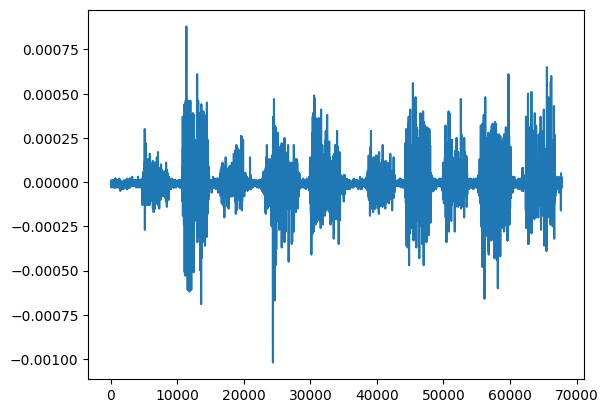

In [20]:
import os
import glob
ruta_p = 'EMG_data_for_gestures-master'
i = 0
diccionario_3d = {} 
for carpeta in os.listdir(ruta_p):
    i+=1
    carpeta_path = os.path.join(ruta_p, carpeta)
    archivos = glob.glob(os.path.join(carpeta_path, '*'))
    if len(archivos)>0:
        primer_archivo = archivos[0]
        df = pd.read_csv(primer_archivo, delimiter="\t")
        diccionario_3d[i] = df
#print(diccionario_3d)
#print(diccionario_3d[12])
#print(diccionario_3d[12].shape)
plt.plot(diccionario_3d[12]['time'],diccionario_3d[12]['channel1'])

In [21]:
def tkeo(a):
	# Create two temporary arrays of equal length, shifted 1 sample to the right
	# and left and squared:
	a = np.array(a)
	i = a[1:-1]*a[1:-1]
	j = a[2:]*a[:-2]
	aTkeo = i-j
	return aTkeo

	# Calculate the difference between the two temporary arrays:
	

[2.e-10 2.e-10 0.e+00 ... 0.e+00 0.e+00 0.e+00]


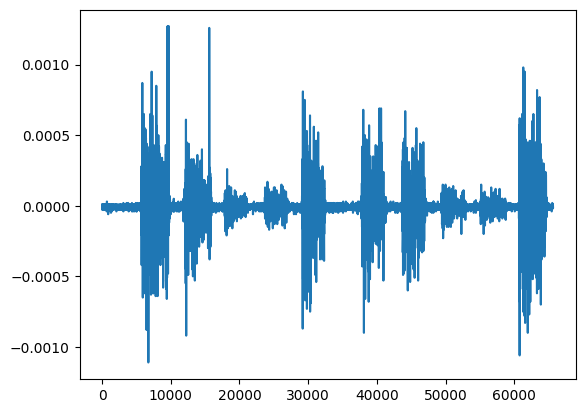

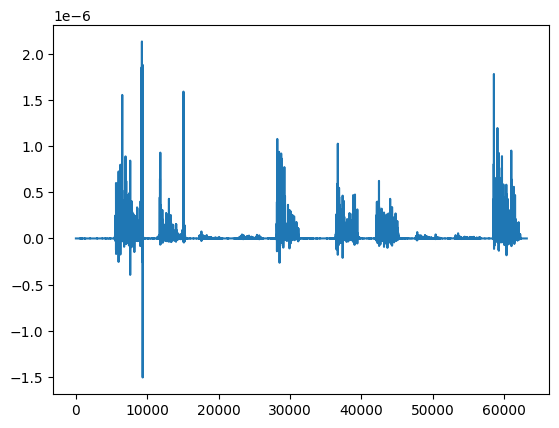

In [22]:
TKEO = tkeo(diccionario_3d[1]['channel1'])
print(TKEO)
time = np.arange(0,len(TKEO))
plt.plot(diccionario_3d[1]['time'],diccionario_3d[1]['channel1'])
plt.show()
plt.plot(time,TKEO)
plt.show()

In [59]:
def tkeo_multiple(n_canal,df):
    res_canales = np.zeros((len(df)-2, n_canal))
    for i in np.arange(1,n_canal+1):
        arreglo = np.array(df[f'channel{i}'])
        ar_tkeo = tkeo(arreglo)
        res_canales[:, i-1] = ar_tkeo
        return(res_canales)
    

In [ ]:
def calcularRMS(X):
  N=X.size #Cantidad de puntos
  rms=(np.sum(X**(2))/N)**0.5
  return rms

In [61]:
def var_est(n_canal,df):
    res_canales = np.zeros((len(df)-2, n_canal))
    for i in np.arange(1,n_canal+1):
        arreglo = np.array(df[f'channel{i}'])
        RMS = calcularRMS(arreglo)
        var = np.var(arreglo)
        
    return RMS, var

(63194, 8)
